# Clustering in Real World


## notes


* Dominant colours in images
  * Pixels - Red, Green, Blue (0-255)
  * Satallite images into land, water, clouds, etc

`matplotlib.image.imread` - Convert image to pixels
`matplotlib.pyplot.imshow` - Display colours of cluster centres


```python

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = img.imread('image.jpg')
image.shape

r = []
g = []
b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

pixels = pd.DataFrame({'red': r, 'blue': b, 'green': g})
pixels.head()

# elbow plot - to get clusters (dominant colours)

distortions = []
num_clusters = range(1, 11)

for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# dominant colours

cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

colours = []
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colours.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# display dominant colours
print(colours)

# dimensions 1x23 (1xNx3 matrix)
plt.imshow([colours])
plt.show()

``` 

## example 1 - batman

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# import images
batman_img = mpimg.imread('batman.jpg')
#clifton_img = mpimg.imread('clifton.jpg')

# print dimensions
print(batman_img.shape)
#print(clifton_img.shape)



(608, 1466, 3)


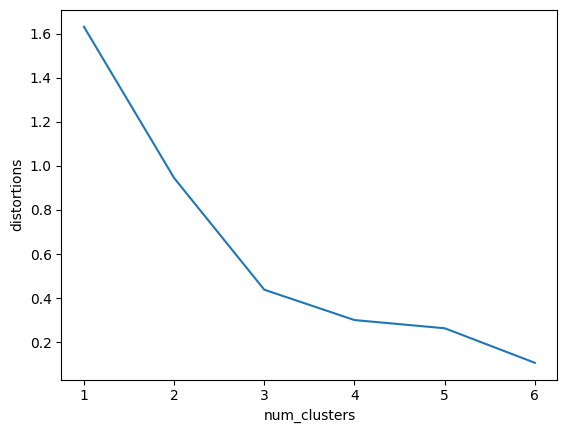

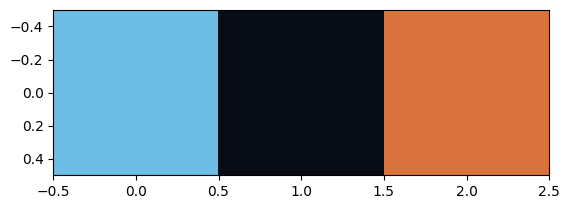

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans

# store rgb values of pixels in lists
batman_r = []
batman_g = []
batman_b = []

for row in batman_img:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        batman_r.append(temp_r)
        batman_g.append(temp_g)
        batman_b.append(temp_b)

# create batman_df
batman_df = pd.DataFrame({'red': batman_r,
                          'blue': batman_b,
                          'green': batman_g})

# scale rgb values with whiten() function
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

distortions = []
num_clusters = range(1, 7)

# create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']], i)
    distortions.append(distortion)

# create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})

# create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Based on the elbow plot, set the optimal number of clusters
optimal_clusters = 3

# Perform k-means clustering with the optimal number of clusters
cluster_centers, distortion = kmeans(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']], optimal_clusters)

# get std for each colour
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colours = []
for cluster_center in cluster_centers:
    scaled_b, scaled_g, scaled_r = cluster_center
    colours.append((scaled_r * r_std, scaled_g * g_std, scaled_b * b_std))

# Normalize the colours to be in the range [0, 1]
colours = [(r/255, g/255, b/255) for r, g, b in colours]

plt.imshow([colours])
plt.show()

![batman-image](batman.jpg)

## mini-batch k-means

* Faster than k-means
* Randomly sample subsets of data
* 

c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment 

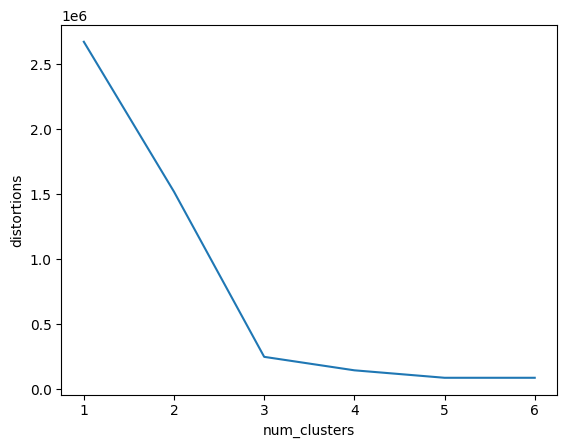

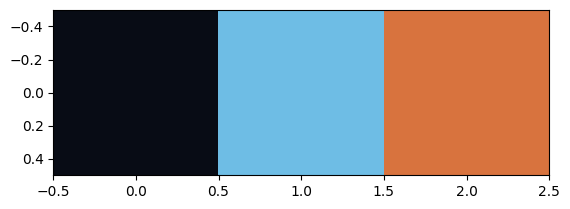

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.vq import whiten

# store rgb values of pixels in lists
batman_r = []
batman_g = []
batman_b = []

for row in batman_img:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        batman_r.append(temp_r)
        batman_g.append(temp_g)
        batman_b.append(temp_b)

# create batman_df
batman_df = pd.DataFrame({'red': batman_r,
                          'blue': batman_b,
                          'green': batman_g})

# scale rgb values with whiten() function
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])


distortions = []
num_clusters = range(1, 7)

# create a list of distortions from the MiniBatchKMeans function
for i in num_clusters:
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, n_init='auto')
    kmeans.fit(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']])
    distortions.append(kmeans.inertia_)

# create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})

# create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Based on the elbow plot, set the optimal number of clusters
optimal_clusters = 3

# Perform MiniBatchKMeans clustering with the optimal number of clusters
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, batch_size=3585, n_init='auto')
kmeans.fit(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']])
cluster_centers = kmeans.cluster_centers_

# get std for each colour
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colours = []
for cluster_center in cluster_centers:
    scaled_b, scaled_g, scaled_r = cluster_center
    colours.append((scaled_r * r_std, scaled_g * g_std, scaled_b * b_std))

# Normalize the colours to be in the range [0, 1]
colours = [(r/255, g/255, b/255) for r, g, b in colours]

plt.imshow([colours])
plt.show()

## clifton image

c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\zoona\anaconda3\envs\mlscientist\lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment 

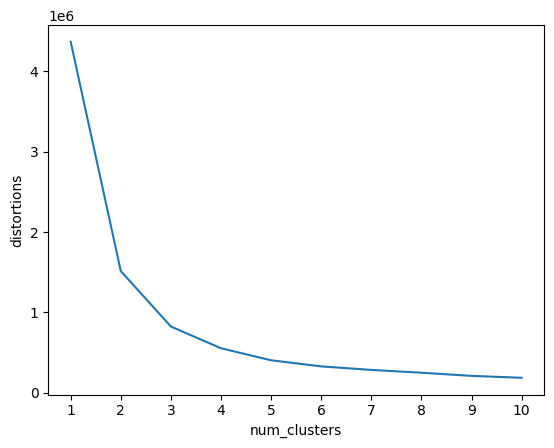

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.vq import whiten
from skimage import io

# Load the image
image = io.imread('clifton.jpg')

# store rgb values of pixels in lists
image_r = []
image_g = []
image_b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        image_r.append(temp_r)
        image_g.append(temp_g)
        image_b.append(temp_b)

# create image_df
image_df = pd.DataFrame({'red': image_r,
                         'blue': image_b,
                         'green': image_g})

# scale rgb values with whiten() function
image_df['scaled_red'] = whiten(image_df['red'])
image_df['scaled_blue'] = whiten(image_df['blue'])
image_df['scaled_green'] = whiten(image_df['green'])


distortions = []
num_clusters = range(1, 11)

# create a list of distortions from the MiniBatchKMeans function
for i in num_clusters:
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=3585, n_init='auto')
    kmeans.fit(image_df[['scaled_blue', 'scaled_green', 'scaled_red']])
    distortions.append(kmeans.inertia_)

# create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})

# create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()


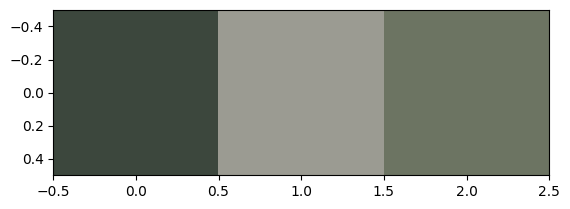

In [3]:

# Based on the elbow plot, set the optimal number of clusters
# Here, you should visually inspect the elbow plot and set the optimal number of clusters
optimal_clusters = 3  # Replace this with the number you determine from the elbow plot

# Perform MiniBatchKMeans clustering with the optimal number of clusters
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, batch_size=3585, n_init='auto')
kmeans.fit(image_df[['scaled_blue', 'scaled_green', 'scaled_red']])
cluster_centers = kmeans.cluster_centers_

# get std for each colour
r_std, g_std, b_std = image_df[['red', 'green', 'blue']].std()

colours = []
for cluster_center in cluster_centers:
    scaled_b, scaled_g, scaled_r = cluster_center
    colours.append((scaled_r * r_std, scaled_g * g_std, scaled_b * b_std))

# Normalize the colours to be in the range [0, 1]
colours = [(r/255, g/255, b/255) for r, g, b in colours]

plt.imshow([colours])
plt.show()

![clifton-image](clifton.jpg)

### Document clustering

1. clean data - remove stop words, punctuation, etc
2. vectorize data - count vectorizer, tf-idf vectorizer
3. cluster data - k-means, mini-batch k-means, etc

```python

from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        
        if len(token) > 1 and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
            
    return cleaned_tokens

```



A Document-Term Matrix (DTM) and a Sparse Matrix are both concepts used in text mining and natural language processing (NLP).

### Document-Term Matrix (DTM)
A Document-Term Matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. Each row of the matrix corresponds to a document, and each column corresponds to a term (word). The value at the intersection of a row and a column indicates the frequency of the term in the document.

For example:


In [ ]:
       term1  term2  term3
doc1      1      0      2
doc2      0      3      1
doc3      2      1      0



### Sparse Matrix
A Sparse Matrix is a matrix in which most of the elements are zero. In the context of a Document-Term Matrix, it is common to have a sparse matrix because not all terms appear in every document. Sparse matrices are useful because they save memory and computational resources by only storing non-zero elements.

For example, the above DTM can be represented as a sparse matrix:


In [ ]:
(0, 0)  1
(0, 2)  2
(1, 1)  3
(1, 2)  1
(2, 0)  2
(2, 1)  1



### Usage in NLP
- **DTM**: Used for text analysis, topic modeling, and information retrieval.
- **Sparse Matrix**: Efficiently stores and processes large DTMs, especially when dealing with large corpora.

In Python, libraries like `scikit-learn` and `scipy` provide tools to create and manipulate these matrices. For example, `CountVectorizer` in `scikit-learn` can be used to create a DTM, and `scipy.sparse` can be used to handle sparse matrices.

### tf-idf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfdif_vectorizer = TfidfVectorizer(max_df=0.8, max_features=50, min_df=0.2, tokenizer=remove_noise)
tfidf_matrix = tfdif_vectorizer.fit_transform(documents)

* `kmeans()` does not support sparse matrices
* use `.todense()` to convert sparse matrix to dense matrix

```python

cluser_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

```

In [ ]:
terms = tfidf_vectorizer.get_feature_names.out()

for i in range(num_clusters):
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

**considerations**

* work with hyperlinks, emoticons, etc.
* normalise words (run, ran, running -> run)
* `.todense()` - may not work with large datasets

### example

In [4]:
# Load the data
plots = pd.read_csv('movies_plot.csv')
#fifa = pd.read_csv('fifa_18_sample_data.csv')

In [6]:
import nltk
import os

# Set the NLTK data path
nltk_data_path = os.path.join(os.getenv('APPDATA'), 'nltk_data')
nltk.data.path.append(nltk_data_path)

# Download the 'punkt' resource
nltk.download('punkt_tab', download_dir=nltk_data_path)


[nltk_data] Error loading punkt_tab: [X509V3: INVALID_CERTIFICATE]
[nltk_data]     invalid certificate (_ssl.c:4192)


False

In [8]:
print(plots.shape)
print(plots.head())

(1000, 2)
                       Title  \
0  The Ballad of Cable Hogue   
1        Monsters vs. Aliens   
2           The Bandit Queen   
3               Broken Arrow   
4                   Dolemite   

                                                Plot  
0  Cable Hogue is isolated in the desert, awaitin...  
1  In the far reaches of space, a planet explodes...  
2  Zarra Montalvo is the daughter of an American ...  
3  Major Vic Deakins (John Travolta) and Captain ...  
4  Dolemite is a pimp and nightclub owner who is ...  


In [10]:
import nltk
import ssl

# Disable SSL verification
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download the 'stopwords' and 'punkt' resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zoona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zoona\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk



# Define the remove_noise function
def remove_noise(text):
    stop_words = ['the', 'and', 'is', 'in']  # Define your stop words list here
    tokens = word_tokenize(text)
    cleaned_tokens = []
    
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        
        if len(token) > 1 and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
            
    return ' '.join(cleaned_tokens)

# Concatenate the title and synopsis for each row
#concatenated_plots = [' '.join(row) for row in plots]

# Initialize TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, min_df=0.1, max_features=50)

# Use the .fit_transform() method on the concatenated plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

# Check the shape of tfidf_matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (2, 2)


[nltk_data] Error loading stopwords: [X509V3: INVALID_CERTIFICATE]
[nltk_data]     invalid certificate (_ssl.c:4192)
[nltk_data] Error loading punkt_tab: [X509V3: INVALID_CERTIFICATE]
[nltk_data]     invalid certificate (_ssl.c:4192)


In [13]:
print(plots.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1000 non-null   object
 1   Plot    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


In [17]:
import pandas as pd
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Disable SSL verification
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download the 'stopwords' and 'punkt' resources
nltk.download('stopwords')
nltk.download('punkt')

# Define the remove_noise function
def remove_noise(text):
    #stop_words = ['the', 'and', 'is', 'in']  # Define your stop words list here
    stop_words = set(stopwords.words('english')) # Use the NLTK stopwords list
    tokens = word_tokenize(text)
    cleaned_tokens = []
    
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        
        if len(token) > 1 and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
            
    return ' '.join(cleaned_tokens)

# Example DataFrame (replace this with your actual data)

plots_df = plots.copy()

# Print the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(plots_df.head())

# Concatenate the title and synopsis for each row
concatenated_plots = plots_df.apply(lambda row: ' '.join([str(row['Title']), str(row['Plot'])]), axis=1)

# Print the first few concatenated plots for debugging
print("First few concatenated plots:")
for plot in concatenated_plots.head(1):
    print(plot)

First few rows of the DataFrame:
                       Title  \
0  The Ballad of Cable Hogue   
1        Monsters vs. Aliens   
2           The Bandit Queen   
3               Broken Arrow   
4                   Dolemite   

                                                Plot  
0  Cable Hogue is isolated in the desert, awaitin...  
1  In the far reaches of space, a planet explodes...  
2  Zarra Montalvo is the daughter of an American ...  
3  Major Vic Deakins (John Travolta) and Captain ...  
4  Dolemite is a pimp and nightclub owner who is ...  
First few concatenated plots:
The Ballad of Cable Hogue Cable Hogue is isolated in the desert, awaiting his partners, Taggart and Bowen, who are scouting for water. The two plot to seize what little water remains to save themselves. Cable, who hesitates to defend himself, is disarmed and abandoned to almost certain death.
Confronted with sandstorms and other desert elements, Cable bargains with God. Four days later, about to perish, he stum

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zoona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zoona\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Initialize TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, min_df=0.1, max_features=50, preprocessor=remove_noise)

# Use the .fit_transform() method on the concatenated plots
tfidf_matrix = tfidf_vectorizer.fit_transform(concatenated_plots)

# Check the shape of tfidf_matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# Print the vocabulary to check what terms are being picked up
print("Vocabulary:")
print(tfidf_vectorizer.vocabulary_)

TF-IDF matrix shape: (1000, 50)
Vocabulary:
{'two': 47, 'death': 6, 'later': 24, 'decides': 7, 'first': 13, 'town': 45, 'tells': 43, 'goes': 17, 'night': 36, 'back': 3, 'get': 15, 'go': 16, 'time': 44, 'life': 27, 'love': 28, 'leave': 25, 'one': 38, 'day': 5, 'men': 31, 'car': 4, 'next': 35, 'takes': 42, 'find': 11, 'another': 1, 'way': 48, 'new': 34, 'man': 30, 'make': 29, 'however': 21, 'tries': 46, 'take': 41, 'returns': 40, 'home': 19, 'family': 8, 'father': 9, 'mother': 33, 'john': 22, 'killed': 23, 'help': 18, 'finds': 12, 'friend': 14, 'nt': 37, 'also': 0, 'away': 2, 'leaves': 26, 'wife': 49, 'house': 20, 'money': 32, 'film': 10, 'police': 39}


In [21]:
from scipy.cluster.vq import kmeans

num_clusters = 5

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(f"Cluster {i+1} top terms:", sorted_terms[:3])

Cluster 1 top terms: ['film', 'life', 'new']
Cluster 2 top terms: ['man', 'town', 'two']
Cluster 3 top terms: ['police', 'car', 'killed']
Cluster 4 top terms: ['back', 'one', 'home']
Cluster 5 top terms: ['john', 'wife', 'love']
